# Unsupervised Learning in Python

Run the hidden code cell below to import the data used in this course.

In [76]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats 

# Import the course datasets 
grains = pd.read_csv('datasets/grains.csv')
fish = pd.read_csv('datasets/fish.csv', header=None)
wine = pd.read_csv('datasets/wine.csv')
eurovision = pd.read_csv('datasets/eurovision-2016.csv')
stocks = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv', index_col=0)
digits = pd.read_csv('datasets/lcd-digits.csv', header=None)

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!
- You work for an agricultural research center. Your manager wants you to group seed varieties based on different measurements contained in the `grains` DataFrame. They also want to know how your clustering solution compares to the seed types listed in the dataset (the `variety_number` and `variety` columns). Try to use all of the relevant techniques you learned in Unsupervised Learning in Python!
- In the `fish` DataFrame, each row represents an individual fish. Standardize the features and cluster the fish by their measurements. You can then compare your cluster labels with the actual fish species (first column).
- In the `wine` DataFrame, there are three `class_labels` in this dataset. Transform the features to get the most accurate clustering.
- In the `eurovision` DataFrame, perform hierarchical clustering of the voting countries using `complete` linkage and plot the resulting dendrogram.

## Clustering "grains"

In [77]:
grains

,0,1,2,3,4,5,6,variety_number,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,Canadian wheat
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,Canadian wheat
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,Canadian wheat
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,Canadian wheat


**How many clusters of grains?**

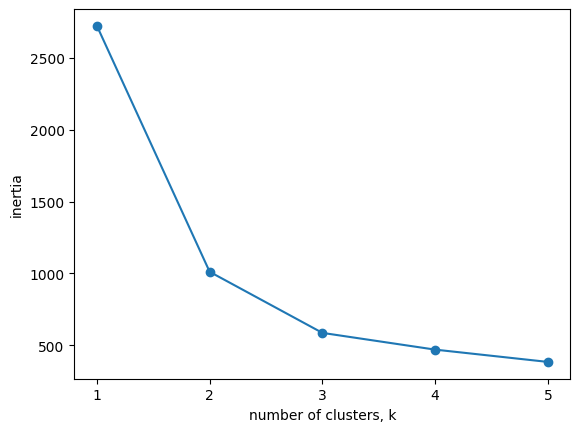

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

samples_grains = grains.iloc[:,0:7]

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples_grains)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


**Evaluating the grains clustering**

In [79]:
varieties = list(grains['variety'])

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
# Using .fit_predict() is the same as using .fit() followed by .predict().
labels = model.fit_predict(samples_grains)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                      68           9           0
1                       0           1          60
2                       2          60          10


## Transforming features for better clusterings

In [80]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [81]:
samples_fish = fish.iloc[:,1:]
species = list(fish.iloc[:,0])

# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples_fish)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples_fish)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({"labels":labels,"species":species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            0     0      0     13
2            0    17      0      0
3            1     0     19      1


**Note** that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [82]:
companies = stocks.index.values.tolist()
companies

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [83]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(stocks)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [84]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(stocks)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by = "labels"))

    labels                           companies
30       0                          MasterCard
23       1                                 IBM
2        1                              Amazon
17       1                     Google/Alphabet
51       1                   Texas instruments
50       1  Taiwan Semiconductor Manufacturing
47       1                            Symantec
43       1                                 SAP
24       1                               Intel
33       1                           Microsoft
18       2                       Goldman Sachs
16       2                   General Electrics
26       2                      JPMorgan Chase
55       2                         Wells Fargo
5        2                     Bank of America
3        2                    American express
1        2                                 AIG
28       3                           Coca Cola
41       3                       Philip Morris
38       3                               Pepsi
40       3   

# Visualization with hierarchical clustering and t-SNE

**Hierarchical clustering of the grain data**

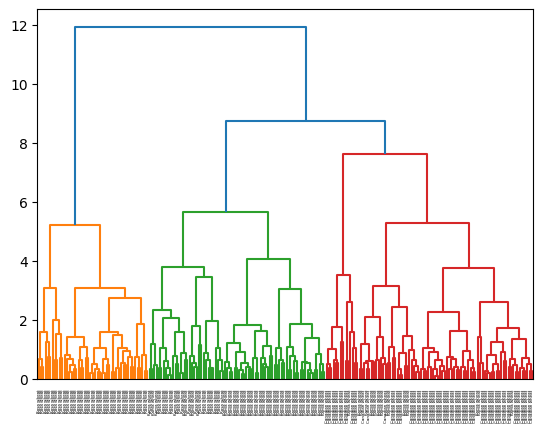

In [85]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples_grains, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=3,
)
plt.show()

**Hierarchies of stocks**

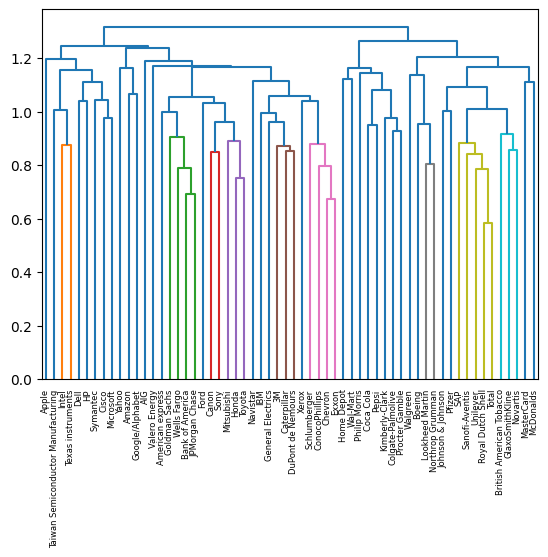

In [86]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(stocks)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = "complete")

# Plot the dendrogram
dendrogram(mergings,labels = companies,leaf_rotation = 90, leaf_font_size = 6)
plt.show()


**Cluster labels in hierarchical clustering**

`Linkage method` defines how the distance between clusters is measured. In `complete linkage`, the distance between clusters is the distance between the furthest points of the clusters. In `single linkage`, the distance between clusters is the distance between the closest points of the clusters.

![image](image.png)

A. In single linkage, Cluster 3 is the closest cluster to Cluster 2.

B. In complete linkage, Cluster 1 is the closest cluster to Cluster 2.

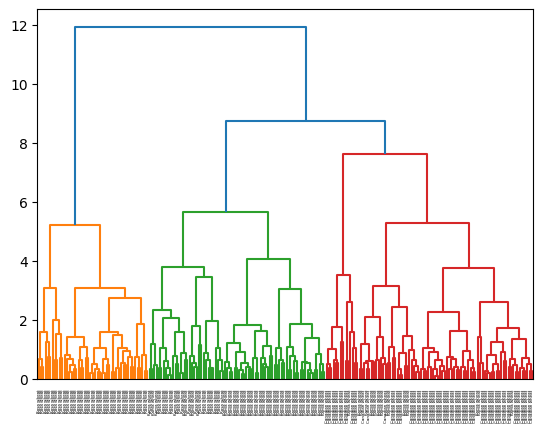

In [87]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples_grains, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=3,
)
plt.show()

In [88]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion = 'distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


## t-SNE for 2-dimensional maps
t-SNE = "t-distribution Stochastic neighbor embedding"
- It maps samples from their high-dimensional space into a 2 or 3 dimensional space so they can be visualized. 
- **Be Aware that the axes of a t-SNE plot do not have any interpretable meaning**

## t-SNE visualization of grains dataset (7 features = 7 dimension)
**--> t-SNE maps from 7 dimension into 2 dimension in grains dataset**

[[ -5.808245    -0.265055  ]
 [ -6.557725    -2.8285875 ]
 [ -2.4418223   -1.8055319 ]
 [ -1.9297155   -3.3435538 ]
 [ -7.876609    -0.3921471 ]
 [ -3.056938    -1.8872453 ]
 [ -2.2348971    1.2393113 ]
 [ -1.862216    -2.1698866 ]
 [ -8.185543     1.8863299 ]
 [ -7.956804     1.1556172 ]
 [ -3.5026362    4.5611057 ]
 [ -3.610013    -3.617783  ]
 [  0.13946429   0.3235713 ]
 [ -0.62690866  -1.5365905 ]
 [ -0.82572365  -2.171755  ]
 [ -0.7972463    1.7834036 ]
 [ 11.373037    -4.8173323 ]
 [ -7.171664    -0.96908605]
 [ -4.4449325   -2.61525   ]
 [  7.693824    -6.9580407 ]
 [ -1.6612773   -0.62151784]
 [ -2.0932336   -1.5528767 ]
 [ -7.992935    -1.5137188 ]
 [  2.368044    -4.9002476 ]
 [ -5.981521    -1.7069954 ]
 [ -8.308513    -0.8032824 ]
 [  3.8051174   -7.232369  ]
 [  1.9510182   -6.8838468 ]
 [ -1.7245443   -1.6477749 ]
 [  0.5691578   -1.4510758 ]
 [ -0.02568844  -5.0320015 ]
 [ -4.52298      2.4144173 ]
 [ -0.82264364   0.92925364]
 [ -2.659328    -3.266269  ]
 [ -5.4372745 

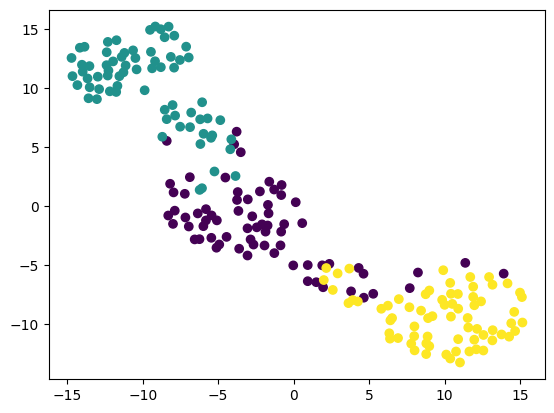

In [89]:
variety_numbers = list(grains['variety_number'])

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
# TSNE only has fit_transform() NOT separate fit() and transform() methods
tsne_features = model.fit_transform(samples_grains)
print(tsne_features)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

## t-SNE map for stock (963 features = 963 dimension)

In [90]:
stocks.shape

(60, 963)

In [91]:
len(normalized_movements[0])

963

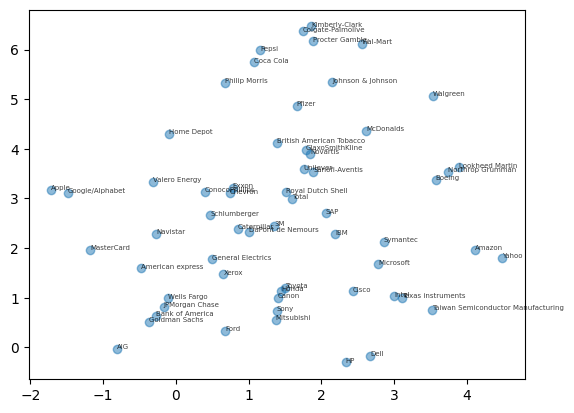

In [92]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

# Decorrelating your data and dimension reduction
**Dimension reduction finds pattern in data, and uses these patterns to re-express it in a compressed form.**

**Visualizing the PCA transformation** 

PCA = "Principal Component Analysis"
- 1st step --> decorrelation
- 2nd step --> dimension reduction 

## 1st step --> decorrelation

**PCA aligns data with axes**
- Rotates data samples to be aligned with axes
- Shifts data sample so they have mean 0
- No information is lost

![image-2](image-2.png)


**PCA follows fit/transform pattern**
- `fit()` learns the transformation from given data
- `transform()` applies the learned transformation
- `transform()` can be applied to new data

### * Decorrelating the grain measurements with PCA

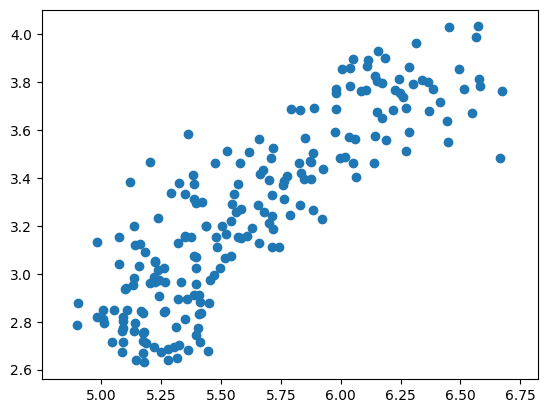

0.8604149377143469


In [93]:
grains_array = np.array(grains.iloc[:,3:5])

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains_array[:,0]

# Assign the 1st column of grains: length
length = grains_array[:,1]

plt.clf()
# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation) #<-- highly correlated


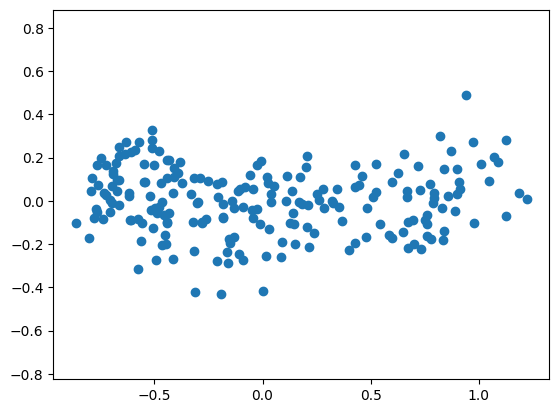

4.217546450968612e-17


In [94]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
"""PCA features 
- Rows of transformed correspond to samples
- Columns of transformed are the 'PCA features'
- Row gives PCA feature values of corresponding sample"""
pca_features = model.fit_transform(grains_array) #<-- transformed sample

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation) #<-- decorrelated

## 2nd step --> dimension reduction 
- For dimension reduction --> Q. How much should the dimension be reduced to such that the remaining feature(dimension) still approximate the original dataset? --> This is where **Intrinsic dimension** comes in.

### Intrinsic dimension  
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- **The intrinsic dimension can be identified by counting the PCA features that have high variance.**

**Note: The first principal component**

The first principal component of the data is the direction in which the data varies the most.

[5.62853333 3.25860476]
[0.76912343 0.63910027]


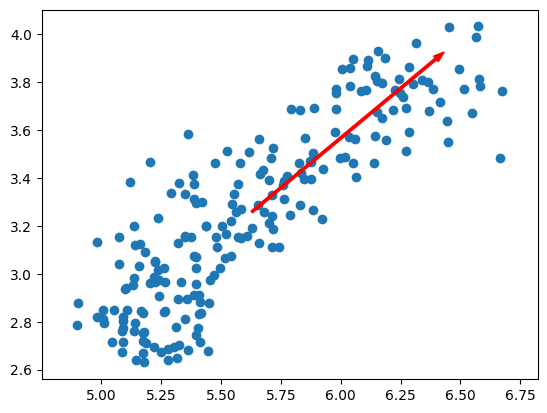

In [95]:
plt.clf()

# Make a scatter plot of the untransformed points
plt.scatter(grains_array[:,0], grains_array[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains_array)

# Get the mean of the grain samples: mean
mean = model.mean_
print(mean)

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
print(first_pc)

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. 

range(0, 6)


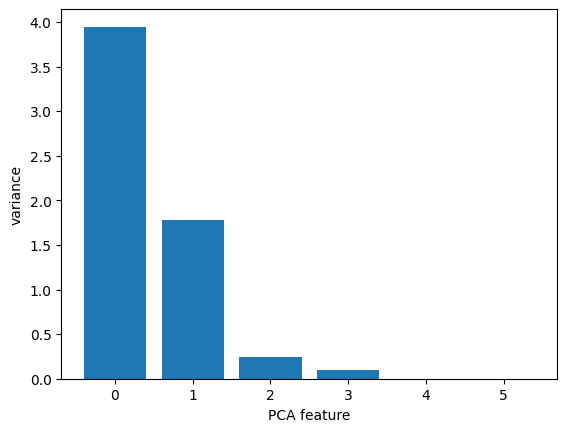

In [96]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples_fish)

# Extract the number of components used using the .n_components_ attribute of pca. Place this inside a range() function and store the result as features
features = range(pca.n_components_)
print(features)

# Plot the explained variances
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


**Note:** Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

## Dimension reduction with PCA
- Represents same data with less features
![image-3](image-3.png)
- To use PCA for dimension reduction, you need to specify how many PCA features to keep Eg. `PCA(n_components=2)` keeps only the first 2 features

In [97]:
# Dimension reduction of the fish measurements

# Import PCA
from sklearn.decomposition import PCA 

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

#scaled_samples
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples_fish)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


Successfully reduced the dimensionality from 6 to 2.

## Alternative Implementation of PCA --> Word Frequency Arrays 
- Rows represent documents, columns represent words
- Entries measure presense of each word in each document
- **Since it contains most entries = 0, arrays like this are called "sparse" and are often represented by special type of array called "csr_matrix".**
- `csr_matrix` remembers only non-zero entries (Saves Space!)

**Note:** `PCA` doesn't support `csr_matrix` so use `TruncatedSVD` instead which performs same transformation.

## A tf-idf word-frequency array
- tf = frequency of word in document
- idf = reduces influence of frequent words

In [98]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)
print(csr_mat)

# Print result of toarray() method
samples = csr_mat.toarray()
print(csr_mat.toarray())

# The columns of the array correspond to words. Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

  (0, 3)	0.680918560398684
  (0, 4)	0.5178561161676974
  (0, 0)	0.5178561161676974
  (1, 5)	0.680918560398684
  (1, 2)	0.5178561161676974
  (1, 4)	0.5178561161676974
  (2, 1)	0.680918560398684
  (2, 2)	0.5178561161676974
  (2, 0)	0.5178561161676974
[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


## Clustering Wikipedia 

In [99]:
articles = pd.read_csv('wikipedia-vectors.csv')
articles = articles.transpose()
titles = list(articles.index)

In [100]:
articles.shape

(61, 13125)

In [101]:
len(titles)

61

In [102]:
titles

['Unnamed: 0',
 'HTTP 404',
 'Alexa Internet',
 'Internet Explorer',
 'HTTP cookie',
 'Google Search',
 'Tumblr',
 'Hypertext Transfer Protocol',
 'Social search',
 'Firefox',
 'LinkedIn',
 'Global warming',
 'Nationally Appropriate Mitigation Action',
 'Nigel Lawson',
 'Connie Hedegaard',
 'Climate change',
 'Kyoto Protocol',
 '350.org',
 'Greenhouse gas emissions by the United States',
 '2010 United Nations Climate Change Conference',
 '2007 United Nations Climate Change Conference',
 'Angelina Jolie',
 'Michael Fassbender',
 'Denzel Washington',
 'Catherine Zeta-Jones',
 'Jessica Biel',
 'Russell Crowe',
 'Mila Kunis',
 'Dakota Fanning',
 'Anne Hathaway',
 'Jennifer Aniston',
 'France national football team',
 'Cristiano Ronaldo',
 'Arsenal F.C.',
 'Radamel Falcao',
 'Zlatan Ibrahimović',
 'Colombia national football team',
 '2014 FIFA World Cup qualification',
 'Football',
 'Neymar',
 'Franck Ribéry',
 'Tonsillitis',
 'Hepatitis B',
 'Doxycycline',
 'Leukemia',
 'Gout',
 'Hepatitis

In [103]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50) #<-- like PCA n_components=50 means dimension reduction to 50

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [104]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
df.sort_values(by='label')

,label,article
60,0,Adam Levine
58,0,Red Hot Chili Peppers
57,0,Skrillex
56,0,Black Sabbath
55,0,Arctic Monkeys
...,...,...
25,5,Jessica Biel
26,5,Russell Crowe
27,5,Mila Kunis
29,5,Anne Hathaway


# Discovering interpretable features

## Non-negative matrix factorization(NMF)
- Dimension reduction technique
- interpretable (unlike PCA)
- NMF express documents as combinations of topics and images as combinations of patterns

- follows `fit()` / `transform()` pattern
- must specify no. of components i.e `NMF(n_components = 2)`

In [105]:
samples

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ],
       [0.        , 0.        , 0.51785612, 0.        , 0.51785612,
        0.68091856],
       [0.51785612, 0.68091856, 0.51785612, 0.        , 0.        ,
        0.        ]])

In [106]:
from sklearn.decomposition import NMF
#create NMF model 
model = NMF(n_components=2)
#fit the model to samples
model.fit(samples)

NMF(n_components=2)

In [107]:
# NMF components --> Dimension of components = dimension of samples
nmf_components = model.components_
nmf_components

array([[5.07156785e-01, 0.00000000e+00, 5.07299482e-01, 6.66929994e-01,
        1.01457760e+00, 6.67117617e-01],
       [5.86925227e-01, 7.71689974e-01, 5.86855023e-01, 4.61618718e-05,
        9.87338634e-09, 0.00000000e+00]])

In this example, there are 2 components, and they live in 6 dimensioinal space, corresponding to 6 words in the vocabulary.

In [108]:
# NMF features
nmf_features = model.transform(samples)
nmf_features #<-- dimension reduced 

array([[5.10368218e-01, 7.66024956e-05],
       [5.10469814e-01, 0.00000000e+00],
       [0.00000000e+00, 8.82373201e-01]])

The transformed data in this example will have two columns, corresponding to our two new features.

#### Reconstruction of sample -- combine feature values with components
![image-4](image-4.png)

This reconstruction of sample id called **"Matrix Factorization"**

## NMF learns interpretable parts

In [109]:
digits.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
           dtype='int64', length=104)

In [110]:
digits.shape

(100, 104)

In [111]:
from sklearn.decomposition import NMF

# NMF model
nmf = NMF(n_components=10)
nmf.fit(digits)

NMF(n_components=10)

In [112]:
nmf.components_.shape # 10 components are store as 10 rows of a 2-d array

(10, 104)

The rows, or components live in 105 dimensional space - there is one dimension for each feature.

Where,

- For documents, NMF components represent topics 
- For images, NMF components are parts of images

## Encoding a collection of images
--> Grey scale ranges from 0-1, 0 being black and 1 being white

![image-5](image-5.png)

- Each row corresponds to an image
- Each column corresponds to a pixel

![image-6](image-6.png)


In [113]:
# given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.
digits.shape

(100, 104)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


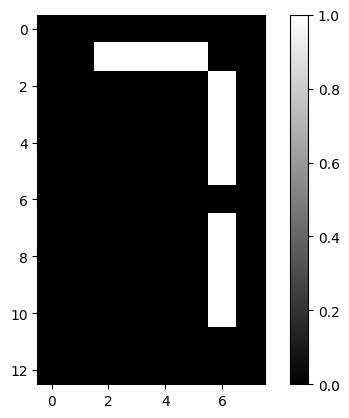

In [114]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = np.array(digits.iloc[0,:])

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap) #notice that the 1s show the digit 7!

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### NMF learns the parts of images

In [115]:
#displays the image encoded by any 1D array
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

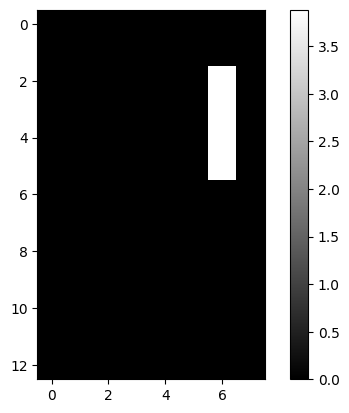

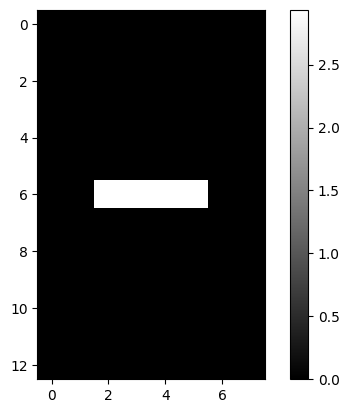

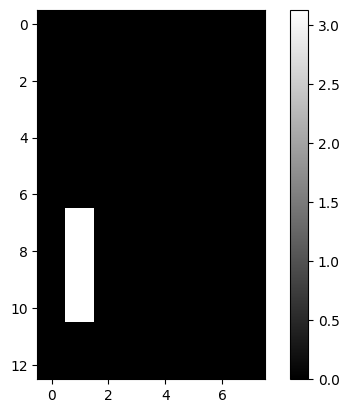

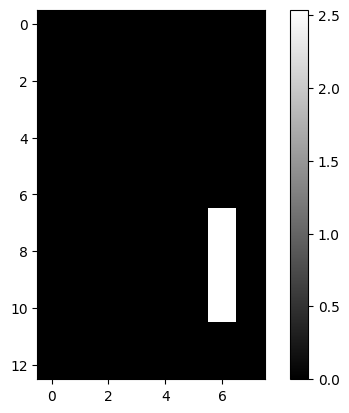

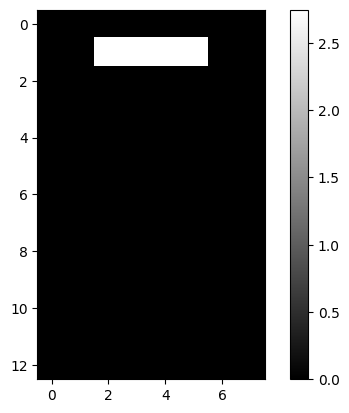

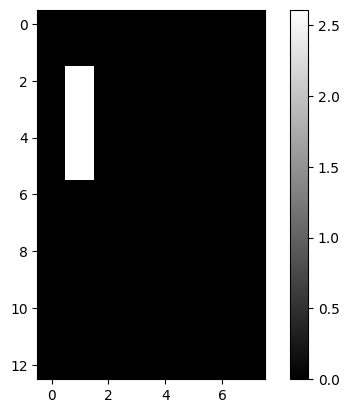

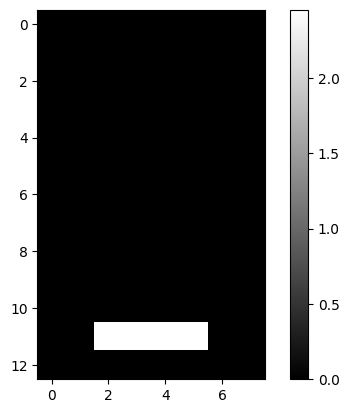

[2.57347960e-01 0.00000000e+00 0.00000000e+00 3.94333376e-01
 3.64045642e-01 0.00000000e+00 3.51281753e-14]


In [116]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7) # since 7 is the number of cells in an LED display

# Apply fit_transform to samples: features
features = model.fit_transform(digits)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

### But PCA doesn't learn parts of images

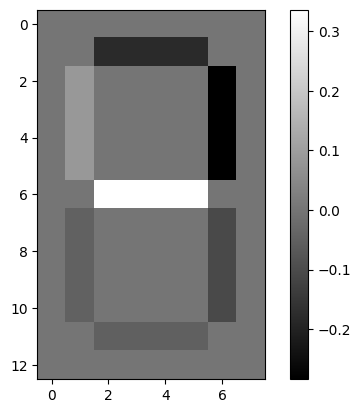

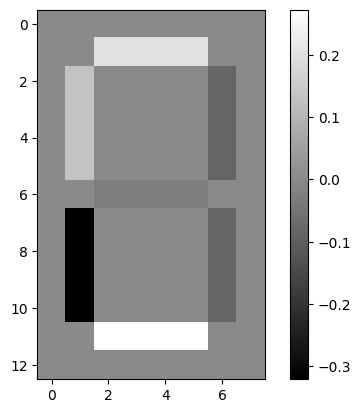

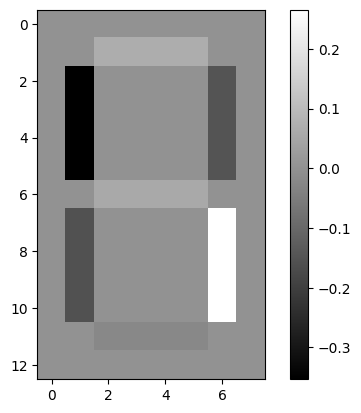

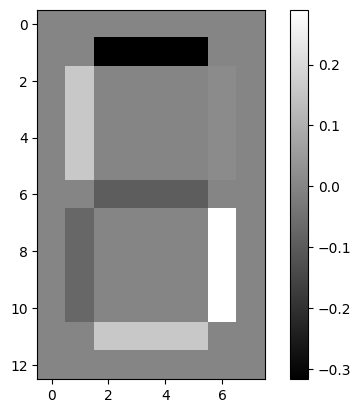

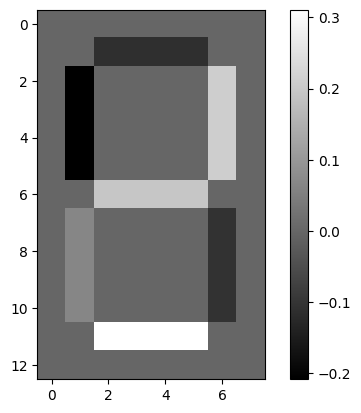

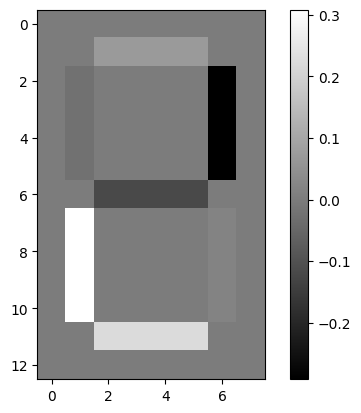

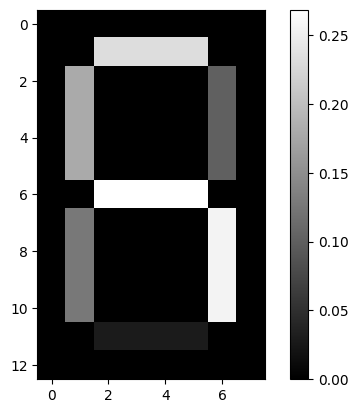

In [117]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(digits)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

# Building recommender systems using NMF
- Task : recommend articles similar to article read by customer
- Strategy: NMF feature values describe the topics, so similar documents have similar NMF feature values

**To recommend similar articles, use Cosine Similarity**

- All versions lie on the same line through the origin

![image-7](image-7.png)

**Cosine Similarity**
- Uses the angle between the lines 
- Higher values means more similar
- Maximun value is 1, when angle is 0 degrees

**Q. Which articles are similar to 'Cristiano Ronaldo'?**

In [120]:
# import NMF
from sklearn.decomposition import NMF

# create NMF model
nmf = NMF(n_components = 6)

# fit_transform() model
nmf_features = nmf.fit_transform(articles)
nmf_features

array([[1.44190598e-10, 4.85229183e-11, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.31418022e+01],
       [7.39901479e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.51336728e-07],
       [7.66236132e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.26714134e-06],
       [4.58266046e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.86015017e-06],
       [4.75755392e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.02385345e-06],
       [3.94576242e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.74803161e-06],
       [5.99565331e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.88255531e-06],
       [5.03608269e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.98223358e-07, 1.71893132e-06],
       [5.48024657e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 

In [123]:
# import normalize function
from sklearn.preprocessing import normalize

# apply normalize to NMF features
norm_features = normalize(nmf_features)

# select the row corresponding to current article/ article of which similar articles are to be searched or recommended
current_article = norm_features[32,:]

# pass current_article to dot method of the array of all normalized features
similarities = norm_features.dot(current_article)
similarities #<-- cosine similarity

array([0.24220437, 0.96584975, 0.96668862, 0.97184645, 0.97223944,
       0.97259148, 0.97333572, 0.97048693, 0.96643493, 0.97003461,
       0.97453059, 0.22361481, 0.23060068, 0.24220437, 0.24220437,
       0.22052059, 0.23831563, 0.24220437, 0.23764451, 0.24220437,
       0.24089563, 0.24220437, 0.24220437, 0.24220437, 0.24220437,
       0.24220437, 0.24220437, 0.24220437, 0.24220437, 0.24220437,
       0.24220437, 0.99711784, 1.        , 0.9254458 , 0.99668634,
       0.99809271, 0.99084244, 0.99698671, 0.78088321, 0.86597234,
       0.99798529, 0.96243441, 0.96237985, 0.96223468, 0.96240832,
       0.9621528 , 0.96249586, 0.96250167, 0.96200859, 0.96251984,
       0.9623816 , 0.23970752, 0.24015058, 0.24198196, 0.24167291,
       0.24192138, 0.24128626, 0.24103393, 0.24178956, 0.98499959,
       0.24041861])

In [129]:
import pandas as pd

# apply normalize to NMF features
norm_features = normalize(nmf_features)

#label similarities with the article titles, using a Dataframe
df = pd.DataFrame(norm_features, index=titles)

# article of which similar articles are to be searched or recommended
current_article = df.loc['Cristiano Ronaldo'] #<-- norm_feature of article "Cristiano Ronaldo"
similarities = df.dot(current_article) #<-- cosine similarity with input norm_feature and df

# find the articles with highest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                    1.000000
Zlatan Ibrahimović                   0.998093
Franck Ribéry                        0.997985
France national football team        0.997118
2014 FIFA World Cup qualification    0.996987
dtype: float64


## Recommend musical artists

In [134]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler() #<-- scale the dataset

# Create an NMF model: nmf
nmf = NMF(n_components = 20) #<-- o/p nmf_features

# Create a Normalizer: normalizer
normalizer = Normalizer() #<-- o/p norm_features

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(articles)

In [136]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,titles)

# Select row of 'Black Sabbath': artist
artist = df.loc['Black Sabbath']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Black Sabbath            1.000000
Red Hot Chili Peppers    0.997694
Arctic Monkeys           0.997280
Adam Levine              0.997002
Chad Kroeger             0.996612
dtype: float64
